In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import datetime
from implementations import*


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


UsageError: Line magic function `%autoreload 2` not found.


In [11]:
from helpers import *

# Loading Data

In [12]:
#load data
PATH = "data/dataset/"
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("data/dataset/", sub_sample=False)



## Data overview


First we should quickly see how train and test data look like and if they are balanced.



In [ ]:
print(f'Training Dataset x shape is {x_train.shape}')
print(f'Ground truth labels y shape is {y_train.shape}')
print(f'Test Dataset X shape is {x_test.shape}')

Training Dataset x shape is (328135, 320)
Ground truth labels y shape is (328135,)
Test Dataset X shape is (109379, 320)


We can see here that there are a lot of features (320), and that we should select some to prevent from non useful calculus.

In [ ]:
print(train_ids)
print(test_ids)


[53 33 20 ... 39 33 32]
[44 27 35 ...  9 15 45]


Here the ids are not relevant : the 1st line is taken out, so we should make a headers file.

In [ ]:
#load headers

with open(os.path.join(PATH, "x_train.csv"), "r") as file:
    header_line = file.readline()
    headers = header_line.strip().split(",")

# isolating the headers in the 'headers' list

print("Headers:")
print(headers)


Headers:
['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENUM', 'PVTRESD1', 'COLGHOUS', 'STATERES', 'CELLFON3', 'LADULT', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'CTELNUM1', 'CELLFON2', 'CADULT', 'PVTRESD2', 'CCLGHOUS', 'CSTATE', 'LANDLINE', 'HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'DIABAGE2', 'SEX', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL2', 'NUMPHON2', 'CPDEMO1', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME2', 'INTERNET', 'WEIGHT2', 'HEIGHT3', 'PREGNANT', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'STOPSMK2', 'LASTSMK2', 'USENOW3', 'ALCDAY5', 'AVEDRNK2', 'DRNK3GE5', 'MAXDRNKS', 'FRUITJU1', 'FRUIT1', 'FVBEANS', 'FVGREEN', 'FVORANG', 'VEGETAB1', 'EXERANY2', '

#### Missing Values


In [ ]:
#detecting missing values

def check_missing_values(vector):
    has_missing_values = np.isnan(vector)



We noticed that many values were missing or equal to 9 which is a missing information, so we decided that is was more pertinent to replace them by the mean value of the feature than deleting it.

In [ ]:
#replacing missing values by the mean

def replace_missing_values(col):
    # Calculer la moyenne de la colonne en ignorant les NaN
    column_means = np.nanmean(col)

    for i in range(len(col)):
        column = col[:, i]
        is_nan = np.isnan(column)
        column[is_nan] = column_means[i]

    return column


## Visualizing data balance

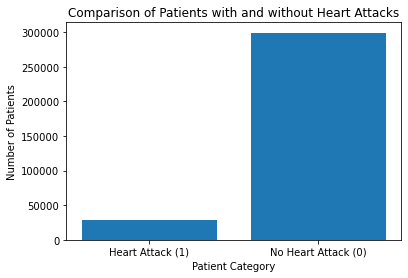

In [ ]:
#counting the number of patients with a heart attack or not
count_y1 = np.sum(y_train == 1)
count_y0 = np.sum(y_train == 0)

# bar plot
categories = ['Heart Attack (1)', 'No Heart Attack (0)']
counts = [count_y1, count_y0]

plt.bar(categories, counts)
plt.xlabel('Patient Category')
plt.ylabel('Number of Patients')
plt.title('Comparison of Patients with and without Heart Attacks')
plt.show()


## DIVISER LE DATA EN TRAIN ET TEST


In [ ]:
def divide_train_test(x_data,y_data,test_size):
    # Set a random seed for reproducibility
    np.random.seed(42)

    # Shuffle the data randomly
    indices = np.random.permutation(len(y_data))

    # Specify the proportion of data to use for the test set (in this example, 20%)
   
    split_index = int(len(y_data) * (1 - test_size))

    # Split the data into training and testing sets
    X_train, X_test = y_data[:split_index], y_data[split_index:]
    Y_train, Y_test = y_data[:split_index], y_data[split_index:]

    return X_train,X_test, Y_train, Y_test




In [ ]:
test_size = 0.2
X_train,X_test, Y_train, Y_test = divide_train_test(balanced_x_train, balanced_y_train, test_size)